In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [51]:
df=pd.read_csv('titanic-passengers.csv' ,sep=";")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S


In [52]:
df.dtypes

PassengerId      int64
Survived        object
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [53]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [54]:
df["Age"].fillna(df["Age"].mean(), inplace=True)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [56]:
df["Cabin"].value_counts()

B96 B98        4
C23 C25 C27    4
G6             4
E101           3
F33            3
              ..
C49            1
E68            1
C45            1
E46            1
E38            1
Name: Cabin, Length: 147, dtype: int64

In [57]:
df["Cabin"].fillna('G6',inplace=True)

In [58]:
df["Embarked"].fillna('S',inplace=True)

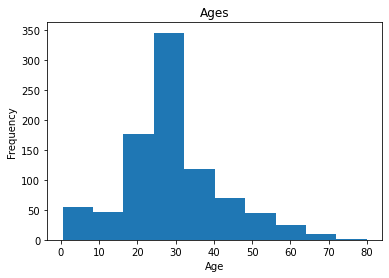

In [59]:
plt.title("Ages")
plt.xlabel('Age')
df["Age"].plot.hist()

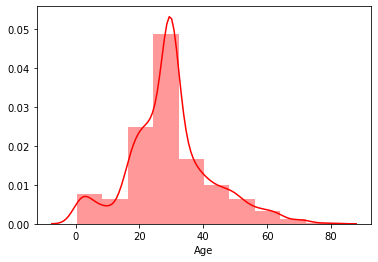

In [60]:
sns.distplot(df["Age"],bins=10,kde=True,color="red")

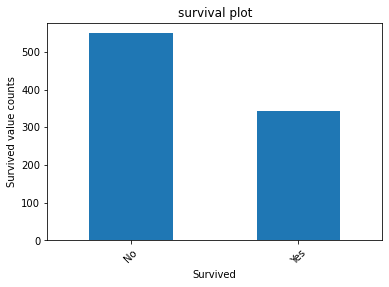

In [61]:
plt.title("survival plot")
plt.xlabel('Survived')
plt.ylabel('Survived value counts')
x=df['Survived'].value_counts()
x.plot.bar(rot=45)

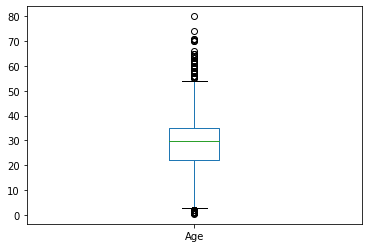

In [62]:
df['Age'].plot.box()

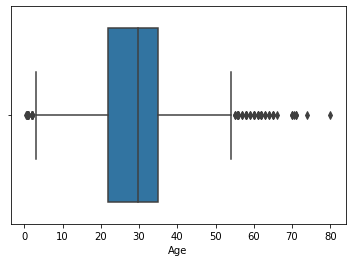

In [63]:

sns.boxplot(df['Age'])

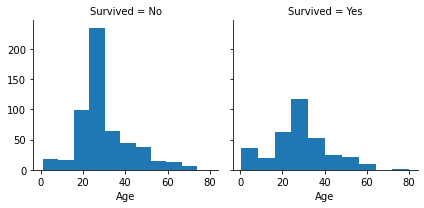

In [64]:
a=sns.FacetGrid(df,col='Survived')
a.map(plt.hist,'Age')

In [65]:
#encoder=LabelEncoder()
#df['Ticket']=encoder.fit_transform(df['Ticket'])
#df['Cabin']=encoder.fit_transform(df['Cabin'])


C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


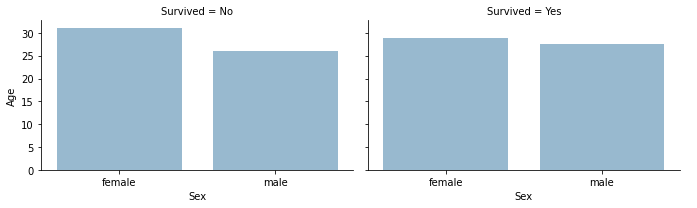

In [66]:
grid = sns.FacetGrid(df, col="Survived",  aspect=1.6)
grid.map(sns.barplot, "Sex", 'Age', alpha=.5, ci=None)
grid.add_legend()

In [67]:
clean={'Survived':{'Yes':1,'No':0}}
df.replace(clean,inplace=True)
df[['Sex','Survived']].groupby(['Sex'],as_index=True).mean()

,Survived
Sex,
female,0.742038
male,0.188908


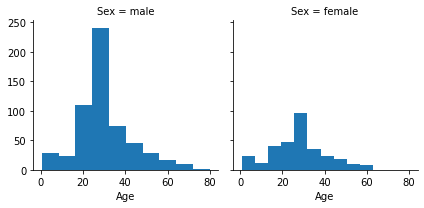

In [68]:
#correlation between Sex and Age
a=sns.FacetGrid(df, col="Sex")
a.map(plt.hist ,'Age')

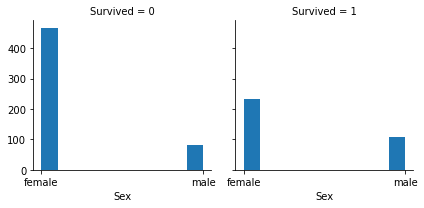

In [69]:
#correlation between Sex and Age
a=sns.FacetGrid(df, col="Survived")
a.map(plt.hist ,'Sex')

In [70]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

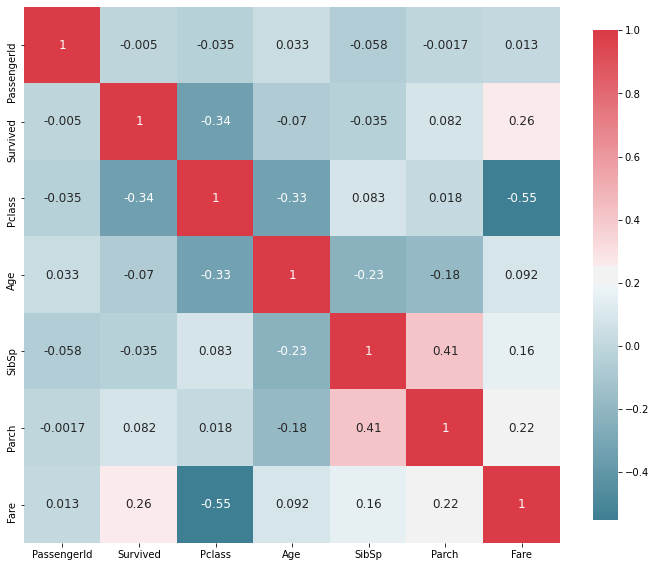

In [71]:
plot_correlation_map(df)

In [72]:
#plot correlation map gives an overview about the correlation between 2 features in the table :
#If the corroraltion is close to 1 than the 2 features are strongly related otherwise they are not related.
#if the correlation is negative it means that if feactue 1 increase than the other decrase or opposite.

In [73]:
df[["Pclass", "Survived"]].groupby(["Pclass"], as_index=True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [119]:
df['Title'] = df['Name'].str.extract("([A-Za-z]+)\.") 


In [120]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Titles,Title
0,343,0,2,"Collander, Mr. Erik Gustaf",male,28.000000,0,0,248740,13.0000,G6,S,,Mr
1,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.000000,0,0,348123,7.6500,F G73,S,,Mr
2,641,0,3,"Jensen, Mr. Hans Peder",male,20.000000,0,0,350050,7.8542,G6,S,,Mr
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.000000,0,4,349909,21.0750,G6,S,,Mrs
4,672,0,1,"Davidson, Mr. Thornton",male,31.000000,1,0,F.C. 12750,52.0000,B71,S,,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,G6,C,,Mrs
887,61,0,3,"Sirayanian, Mr. Orsen",male,22.000000,0,0,2669,7.2292,G6,C,,Mr
888,535,0,3,"Cacic, Miss. Marija",female,30.000000,0,0,315084,8.6625,G6,S,,Miss
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,29.699118,0,0,349215,7.8958,G6,S,,Mr


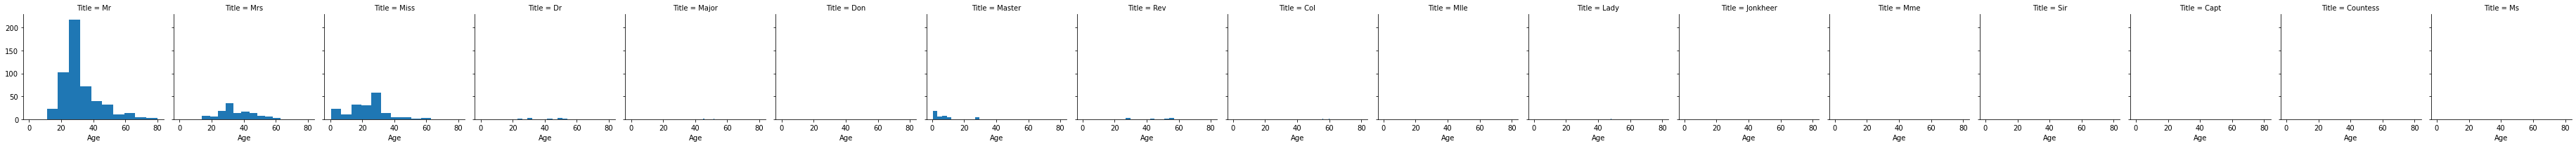

In [121]:
#correlation between age and title
a=sns.FacetGrid(df, col="Title")
a.map(plt.hist ,'Age')

In [122]:
df["Title"].replace({
"Capt":       "Officer",
"Col":        "Officer",
"Major":      "Officer",
"Dr":       "Officer",
 "Rev":     "Officer",
 "Jonkheer":   "Royalty",
 "Don":        "Royalty",
"Sir" :       "Royalty",
"Lady" :      "Royalty",
"the Countess": "Royalty",
"Dona":       "Royalty",
"Mme":        "Miss",
"Mlle":       "Miss",
"Miss" :      "Miss",
"Ms":         "Mrs",
"Mr" :        "Mrs",
"Mrs" :       "Mrs",
"Master" :    "Master" },inplace=True)

In [123]:
df['Title'].value_counts()

Mrs         643
Miss        185
Master       40
Officer      18
Royalty       4
Countess      1
Name: Title, dtype: int64

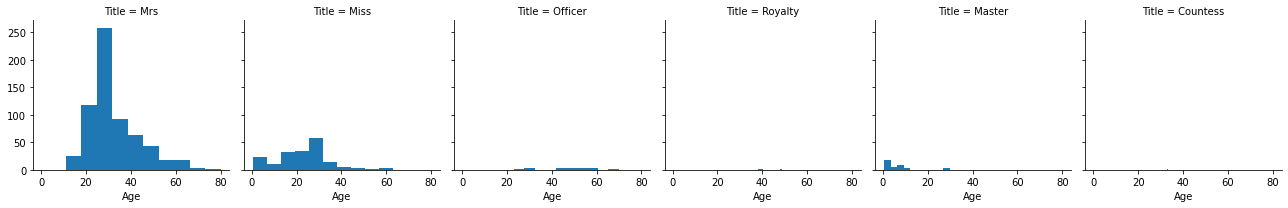

In [124]:
#correlation between age and title
a=sns.FacetGrid(df, col="Title")
a.map(plt.hist ,'Age')


In [125]:
df["familysize"]=df['Parch']+df['SibSp']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Titles,Title,familysize
0,343,0,2,"Collander, Mr. Erik Gustaf",male,28.000000,0,0,248740,13.0000,G6,S,,Mrs,0
1,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.000000,0,0,348123,7.6500,F G73,S,,Mrs,0
2,641,0,3,"Jensen, Mr. Hans Peder",male,20.000000,0,0,350050,7.8542,G6,S,,Mrs,0
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.000000,0,4,349909,21.0750,G6,S,,Mrs,4
4,672,0,1,"Davidson, Mr. Thornton",male,31.000000,1,0,F.C. 12750,52.0000,B71,S,,Mrs,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,G6,C,,Mrs,1
887,61,0,3,"Sirayanian, Mr. Orsen",male,22.000000,0,0,2669,7.2292,G6,C,,Mrs,0
888,535,0,3,"Cacic, Miss. Marija",female,30.000000,0,0,315084,8.6625,G6,S,,Miss,0
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,29.699118,0,0,349215,7.8958,G6,S,,Mrs,0


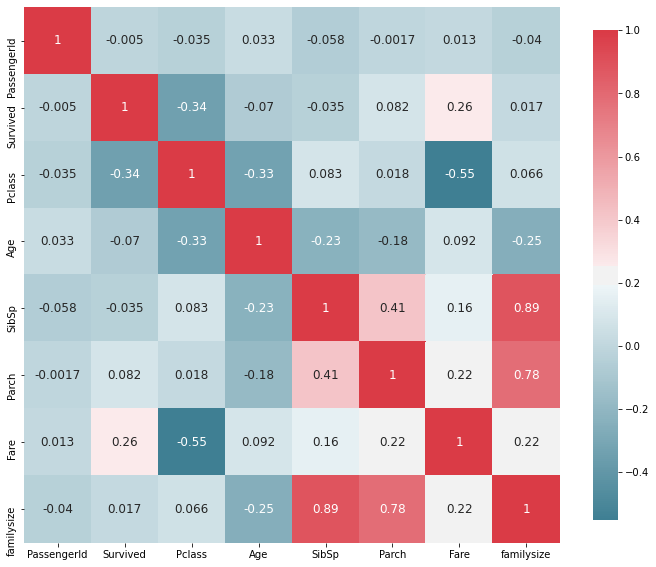

In [127]:
plot_correlation_map(df)

In [ ]:
#the correlation between family size and survived is extremly below 1 (0.017) so there is no  impact of  family size on the survived passengers  